In [24]:
import numpy as np
import cv2
import random
from sklearn.metrics import confusion_matrix
import itertools
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.utils import to_categorical
from sklearn.model_selection import  train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os
from os import getcwd
import warnings
warnings.filterwarnings('ignore')
print(os.listdir("D:/Datasets"))

['fruits-360']


In [26]:
np.random.seed(1234)
training_directory = "D:/Datasets/fruits-360/Training/"
testing_directory = "D:/Datasets/fruits-360/Test/"
classes = ["Apple Red 1", "Banana",  
           "Lemon", "Mango", "Orange","Nightshade Poisonous", 
           "Horsenettle Poisonous", 
           "Pokeberries Poisonous"]
Train = []
Test = []
imsize = 100
for i in classes: 
    train_path = os.path.join(training_directory, i)
    test_path = os.path.join(testing_directory, i)
    index = classes.index(i)
    for train_image in os.listdir(train_path):
        train_array = cv2.imread(os.path.join(train_path, train_image), 
                                 cv2.IMREAD_GRAYSCALE)
        train_array = cv2.resize(train_array, (imsize, imsize))
        Train.append([train_array, index])
    for test_image in os.listdir(test_path):
        test_array = cv2.imread(os.path.join(test_path, test_image), 
                                 cv2.IMREAD_GRAYSCALE)
        test_array = cv2.resize(test_array, (imsize, imsize))
        Test.append([test_array, index])

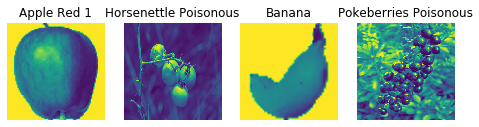

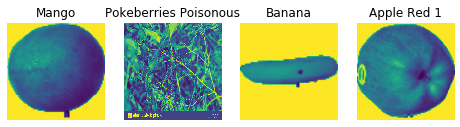

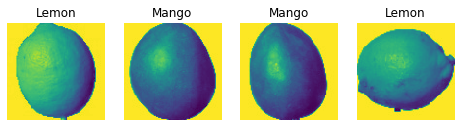

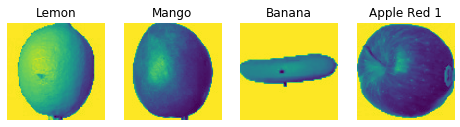

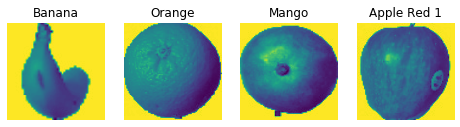

In [62]:
fruits_array_train = []
labels = []
for features, label in Train:
    fruits_array_train.append(features)
    labels.append(label)
loc = [[random.randint(1, 2761), random.randint(1, 2761), random.randint(1, 2761), random.randint(1, 2761)], 
       [random.randint(1, 2761), random.randint(1, 2761), random.randint(1, 2761), random.randint(1, 2761)],
       [random.randint(1, 2761), random.randint(1, 2761), random.randint(1, 2761), random.randint(1, 2761)],
       [random.randint(1, 2761), random.randint(1, 2761), random.randint(1, 2761), random.randint(1, 2761)],
       [random.randint(1, 2761), random.randint(1, 2761), random.randint(1, 2761), random.randint(1, 2761)]
      ]
fruit_names = ["Apple Red 1", "Banana",  
           "Lemon", "Mango", "Orange","Nightshade Poisonous", 
           "Horsenettle Poisonous", 
           "Pokeberries Poisonous"]
a = 0
b = 1
c = 2
d = 3
for i, j, k, l in loc:
    plt.subplots(figsize = (8, 8))
    plt.subplot(1, 4, 1)
    plt.imshow(fruits_array_train[i])
    plt.title(fruit_names[labels[i]])
    plt.axis("off")
    plt.subplot(1, 4, 2)
    plt.imshow(fruits_array_train[j])
    plt.title(fruit_names[labels[j]])
    plt.axis("off")
    plt.subplot(1, 4, 3)
    plt.imshow(fruits_array_train[k])
    plt.title(fruit_names[labels[k]])
    plt.axis("off")
    plt.subplot(1, 4, 4)
    plt.imshow(fruits_array_train[l])
    plt.title(fruit_names[labels[l]])
    plt.axis("off")
    a += 3
    b += 3
    c += 3
    d += 3

In [57]:
X_train = []
Y_train = []
X_test = []
Y_test = []
random.shuffle(Train)
random.shuffle(Test)
for imgarray, labels in Train:
    X_train.append(imgarray)
    Y_train.append(labels)
for imgarray, labels in Test:
    X_test.append(imgarray)
    Y_test.append(labels)
X_train = np.array(X_train)
X_test = np.array(X_test)
X_train = X_train.reshape(-1, imsize, imsize, 1)
X_test = X_test.reshape(-1, imsize, imsize, 1)
X_train = X_train/255
X_test = X_test/255
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)


Shape of X_train: (2761, 100, 100, 1)
Shape of X_test: (901, 100, 100, 1)


In [30]:
Y_train = to_categorical(Y_train, num_classes = 8)
Y_test = to_categorical(Y_test, num_classes = 8)
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, 
                                                  test_size = 0.2, random_state = 50)

In [32]:
model = Sequential()
model.add(Conv2D(filters = 8, kernel_size = (5, 5), padding = "Same", activation = "relu", input_shape = (100, 100, 1)))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 16, kernel_size = (4, 4), padding = "Same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2, 2), strides = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 32, kernel_size = (4, 4), padding = "Same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2, 2), strides = (2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(512, activation = "relu"))
model.add(Dropout(0.25))
model.add(Dense(8, activation = "softmax"))
optimizer = Adam(lr = 0.001)
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 100, 100, 8)       208       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 50, 50, 8)         0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 50, 50, 8)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 50, 50, 16)        2064      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 25, 25, 16)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 25, 25, 32)       

In [33]:
datagen=ImageDataGenerator(#rescale = 1.0 / 255,
                           featurewise_center = False, 
                           samplewise_center = False, 
                           featurewise_std_normalization = False, 
                           samplewise_std_normalization = False,  
                           zca_whitening = False, 
                           rotation_range = 0.5,  
                           zoom_range = 0.5,        
                           #shear_range = 0.5,
                           width_shift_range = 0.5,
                           height_shift_range = 0.5,
                           horizontal_flip = False,  
                           vertical_flip = False
                           #fill_mode = 'nearest'
                           )
datagen.fit(x_train)

history = model.fit_generator(datagen.flow(x_train, y_train, batch_size = 24), epochs=75,
                              validation_data = (x_val, y_val), steps_per_epoch = x_train.shape[0]//24
                             )


Epoch 1/75
92/92 [==============================] - 22s 238ms/step - loss: 1.8545 - accuracy: 0.1907 - val_loss: 1.9182 - val_accuracy: 0.1826
Epoch 2/75
92/92 [==============================] - 21s 225ms/step - loss: 1.5413 - accuracy: 0.3184 - val_loss: 2.2951 - val_accuracy: 0.0344
Epoch 3/75
92/92 [==============================] - 21s 227ms/step - loss: 1.2924 - accuracy: 0.4085 - val_loss: 1.4131 - val_accuracy: 0.3382
Epoch 4/75
92/92 [==============================] - 21s 224ms/step - loss: 1.2272 - accuracy: 0.4488 - val_loss: 1.2237 - val_accuracy: 0.5642
Epoch 5/75
92/92 [==============================] - 21s 225ms/step - loss: 1.0775 - accuracy: 0.5236 - val_loss: 1.4502 - val_accuracy: 0.3924
Epoch 6/75
92/92 [==============================] - 21s 229ms/step - loss: 0.9990 - accuracy: 0.5571 - val_loss: 0.7796 - val_accuracy: 0.6293
Epoch 7/75
92/92 [==============================] - 21s 223ms/step - loss: 0.9124 - accuracy: 0.6123 - val_loss: 0.8691 - val_accuracy: 0.6329

Epoch 58/75
92/92 [==============================] - 21s 231ms/step - loss: 0.2455 - accuracy: 0.9099 - val_loss: 0.4193 - val_accuracy: 0.8644
Epoch 59/75
92/92 [==============================] - 21s 226ms/step - loss: 0.2756 - accuracy: 0.8954 - val_loss: 0.1127 - val_accuracy: 0.9530
Epoch 60/75
92/92 [==============================] - 21s 226ms/step - loss: 0.2593 - accuracy: 0.9013 - val_loss: 0.1612 - val_accuracy: 0.9349
Epoch 61/75
92/92 [==============================] - 21s 230ms/step - loss: 0.2400 - accuracy: 0.9130 - val_loss: 0.2206 - val_accuracy: 0.9078
Epoch 62/75
92/92 [==============================] - 21s 231ms/step - loss: 0.2552 - accuracy: 0.9031 - val_loss: 0.1452 - val_accuracy: 0.9458
Epoch 63/75
92/92 [==============================] - 21s 231ms/step - loss: 0.2629 - accuracy: 0.8990 - val_loss: 0.1445 - val_accuracy: 0.9476
Epoch 64/75
92/92 [==============================] - 22s 234ms/step - loss: 0.2478 - accuracy: 0.9112 - val_loss: 0.1681 - val_accuracy:

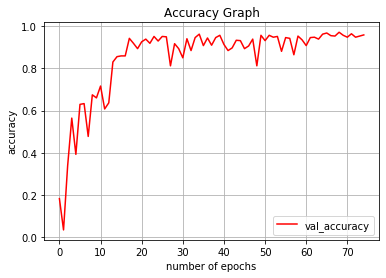

In [34]:
plt.plot(history.history["val_accuracy"],color="r",label="val_accuracy")
plt.title("Accuracy Graph")
plt.xlabel("number of epochs")
plt.ylabel("accuracy")
plt.legend()
plt.grid()
plt.show()

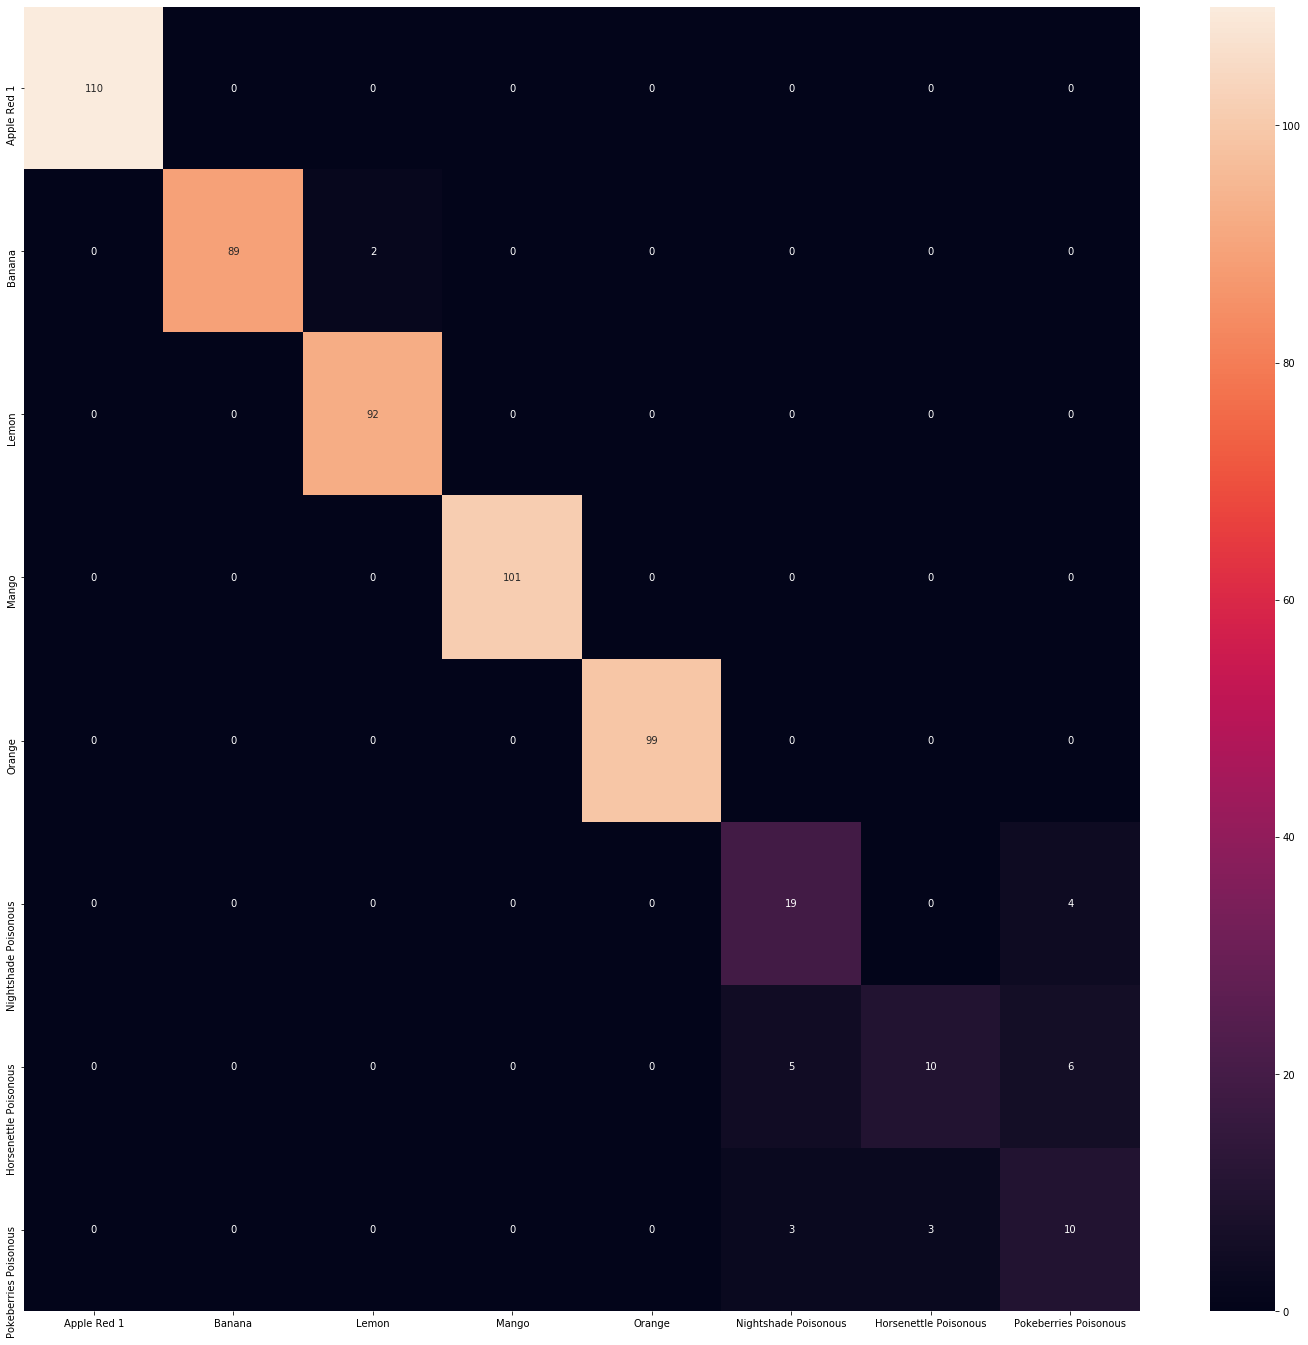

In [40]:
y_pred = model.predict(x_val)
y_pred_classes = np.argmax(y_pred, axis = 1)
y_true = np.argmax(y_val, axis = 1)
conf_mat = confusion_matrix(y_true, y_pred_classes)
fruit_names = ["Apple Red 1", "Banana", "Lemon", "Mango", "Orange", 
               "Nightshade Poisonous", "Horsenettle Poisonous", "Pokeberries Poisonous"]
f,ax = plt.subplots(figsize = (25, 24))
sns.heatmap(conf_mat, annot = True, fmt = '.0f')
ax.set_xticklabels(fruit_names)
ax.set_yticklabels(fruit_names)
plt.show()


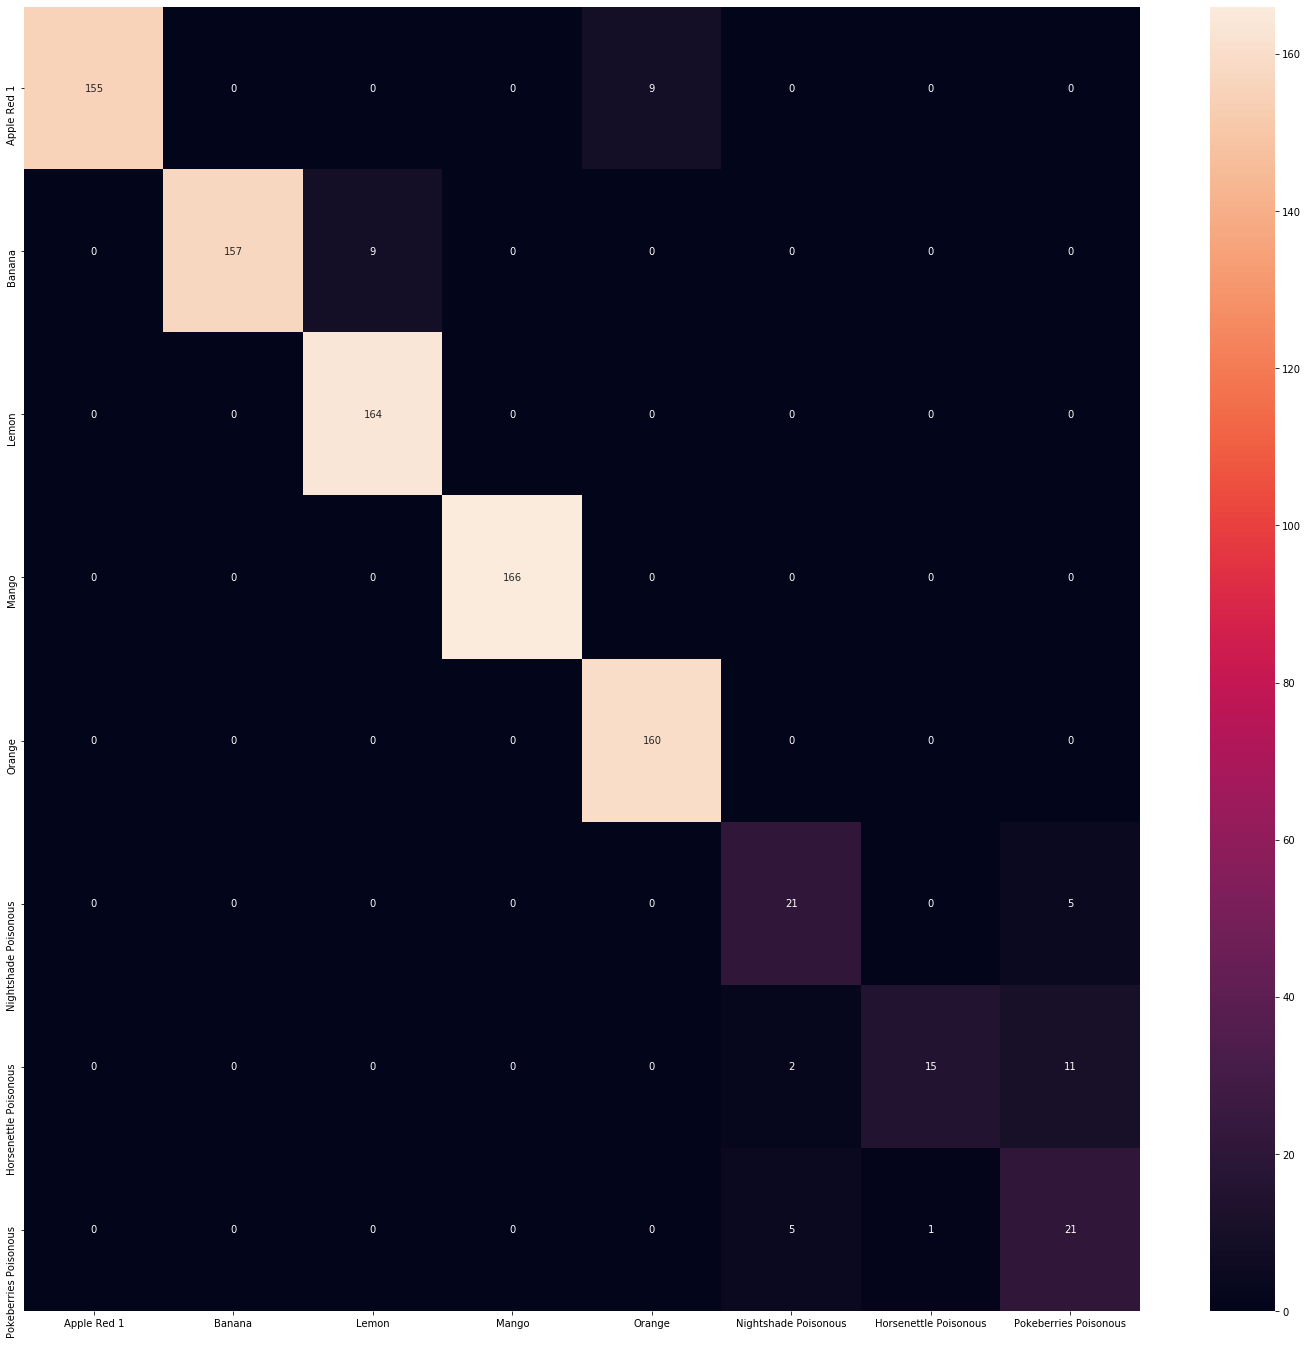

In [38]:
y_pred2 = model.predict(X_test)
y_pred_classes2 = np.argmax(y_pred2, axis = 1)
y_true2 = np.argmax(Y_test, axis = 1)
conf_mat2 = confusion_matrix(y_true2, y_pred_classes2)
f,ax = plt.subplots(figsize = (25, 24))
sns.heatmap(conf_mat2, annot = True, fmt = ".0f")
ax.set_xticklabels(fruit_names)
ax.set_yticklabels(fruit_names)
plt.show()
